In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.


0: 480x640 1 Snow Petrel, 3790.9ms
Speed: 22.2ms preprocess, 3790.9ms inference, 28.8ms postprocess per image at shape (1, 3, 480, 640)


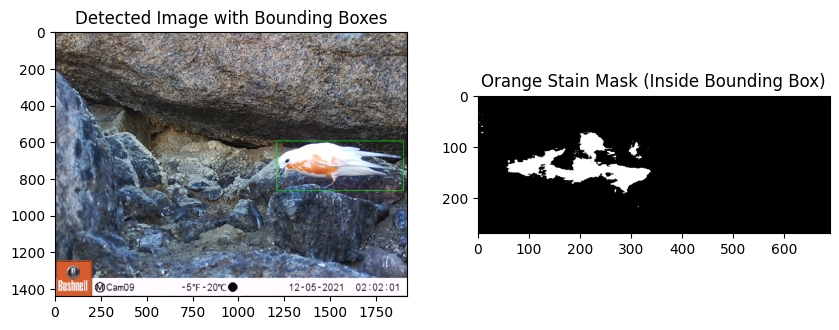

[{'bbox': (1205, 597, 1895, 866),
  'orange_mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}]

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
# ***For optimal results, use the 'best.pt' model corresponding to each camera's images***
model_path = '/content/gdrive/MyDrive/cam09output/cam09-output1/weights/best.pt'
model = YOLO(model_path)

# Function to check for orange stains within the bounding box
def check_orange_stain(cropped_image):
    # Convert the cropped image to HSV color space
    hsv_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2HSV)

    # Define the range for the orange color in HSV
    lower_orange = np.array([10, 20, 150])
    upper_orange = np.array([30, 255, 255])

    # Create a mask for the orange color
    orange_mask = cv2.inRange(hsv_image, lower_orange, upper_orange)


    return np.any(orange_mask), orange_mask

# Load the image
image_path = '/content/12050496.JPG'
img = cv2.imread(image_path)

# Results storage
results_data = []

if img is not None:

    results = model(img, conf=0.75)
    if len(results) > 0 and results[0].boxes is not None:
        detections = results[0].boxes

        for det in detections:
            if int(det.cls) == 0:  # Assuming class 0 is 'Snow Petrel'
                # Extract bounding box coordinates and convert to integers
                bbox = det.xyxy[0].tolist()  # Extract coordinates from the first row (assuming single detection per box)
                x1, y1, x2, y2 = map(int, bbox)  # Convert coordinates to integers

                cropped_image = img[y1:y2, x1:x2]

                orange_detected, orange_mask = check_orange_stain(cropped_image)

                if orange_detected:
                    # Draw bounding box on the original image
                    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    results_data.append({
                        "bbox": (x1, y1, x2, y2),
                        "orange_mask": orange_mask
                    })

                    # Display the mask inside the bounding box alongside the original image with bounding boxes
                    plt.figure(figsize=(10, 10))

                    # Plotting original image with bounding boxes
                    plt.subplot(1, 2, 1)
                    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                    plt.title("Detected Image with Bounding Boxes")

                    # Plotting the mask (cropped area)
                    plt.subplot(1, 2, 2)
                    plt.imshow(orange_mask, cmap='gray')
                    plt.title("Orange Stain Mask (Inside Bounding Box)")

                    plt.show()

results_data



0: 480x640 1 Snow Petrel, 3331.2ms
Speed: 6.7ms preprocess, 3331.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Snow Petrel, 2941.8ms
Speed: 5.3ms preprocess, 2941.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 Snow Petrels, 2913.0ms
Speed: 6.1ms preprocess, 2913.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


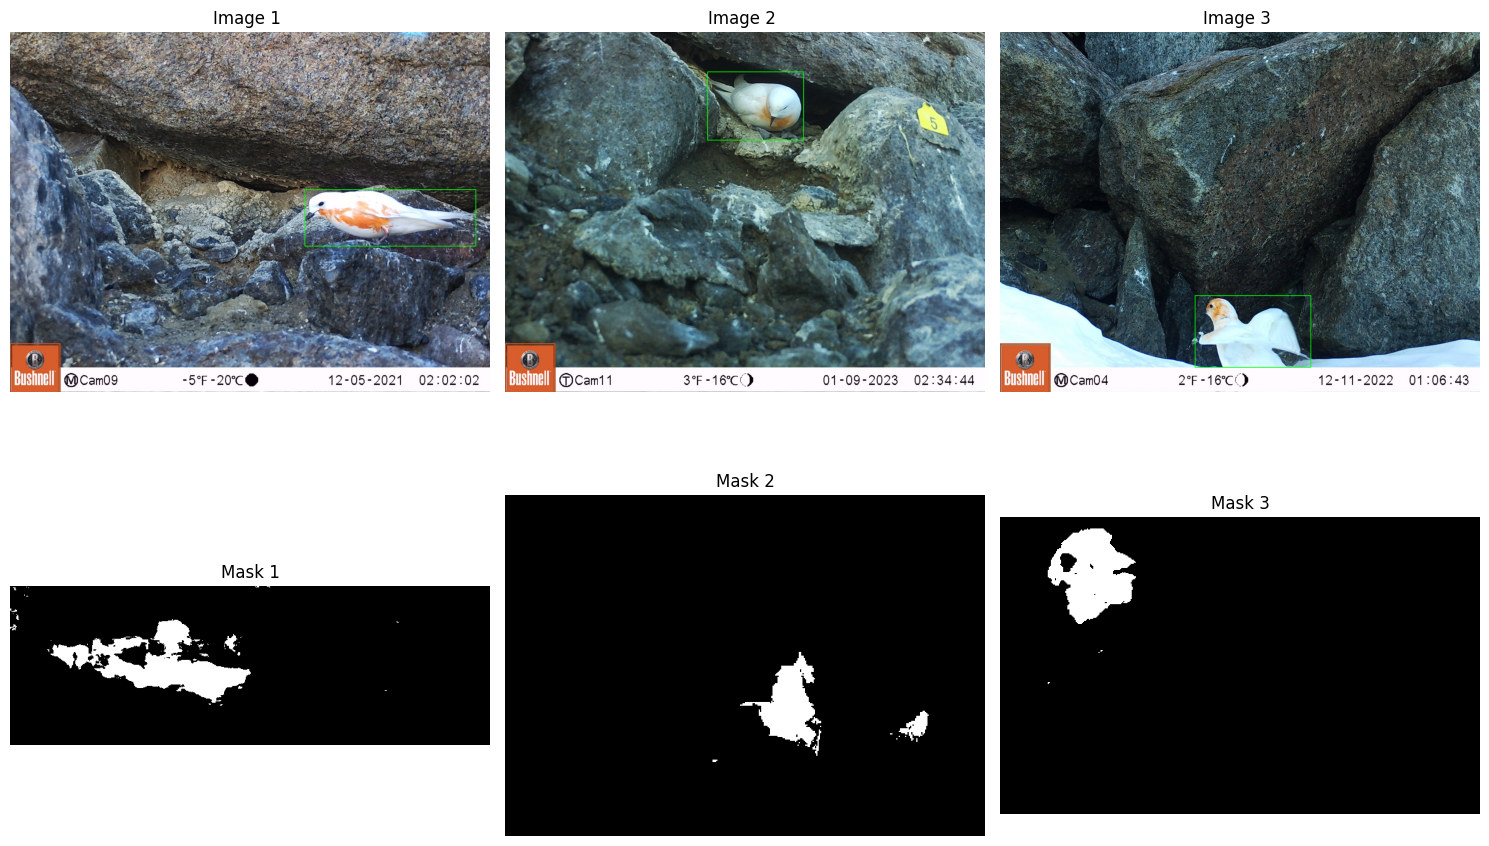

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO


model_path = '/content/gdrive/MyDrive/cam09output/cam09-output1/weights/best.pt'
model = YOLO(model_path)

# Function to check for orange stains within the bounding box
def check_orange_stain(cropped_image):
    # Convert the cropped image to HSV color space
    hsv_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2HSV)

    # Define the range for the orange color in HSV
    lower_orange = np.array([10, 20, 150])
    upper_orange = np.array([30, 255, 255])

    # Create a mask for the orange color
    orange_mask = cv2.inRange(hsv_image, lower_orange, upper_orange)


    return np.any(orange_mask), orange_mask


image_paths = [
    '/content/12050497.JPG',
    '/content/01090472.JPG',
    '/content/12110808.JPG'
]


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, image_path in enumerate(image_paths):
    img = cv2.imread(image_path)

    if img is not None:

        results = model(img, conf=0.75)

        # Assuming results is a list and we check for empty detection
        if len(results) > 0 and results[0].boxes is not None:
            detections = results[0].boxes

            for det in detections:
                if int(det.cls) == 0:

                    bbox = det.xyxy[0].tolist()
                    x1, y1, x2, y2 = map(int, bbox)

                    cropped_image = img[y1:y2, x1:x2]

                    orange_detected, orange_mask = check_orange_stain(cropped_image)

                    if orange_detected:

                        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
                        axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                        axes[i].set_title(f"Image {i+1} ")
                        axes[i].axis('off')
                        axes[i+3].imshow(orange_mask, cmap='gray')
                        axes[i+3].set_title(f"Mask {i+1}")
                        axes[i+3].axis('off')

plt.tight_layout()
plt.show()